# Question 1
Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.
# Question 2
Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.
# Question 3
Build a customer segmentation analysis using RFM (Recency, Frequency, Monetary) methodology. Create scatter plots and segment customers into meaningful groups with actionable insights.
# Question 4
Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.
# Question 5
Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.
# Question 6
Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.
# Question 7
Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).
# Question 8
Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.
# Question 9
Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.
# Question 10
Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.
# Question 11
Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.
# Question 12
Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques.
# Question 13
Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.
# Question 14
Build customer lifetime value (CLV) analysis using cohort analysis, retention curves, and CLV distribution across different customer segments and acquisition years.
# Question 15
Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.
# Question 16
Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges.
# Question 17
Create customer journey analysis showing purchase frequency patterns, category transitions, and customer evolution from first purchase to loyal customers using flow diagrams and transition matrices.
# Question 18
Analyze inventory and product lifecycle patterns. Study product launch success, decline phases, and category evolution over the decade with detailed trend analysis.
# Question 19
Build competitive pricing analysis comparing brand positioning, price ranges, and market penetration strategies across different product categories using box plots and competitive matrices.
# Question 20
Create a comprehensive business health dashboard combining key metrics like revenue growth, customer acquisition, retention rates, and operational efficiency using multi-panel visualizations with executive summary insights.


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from sklearn.cluster import KMeans
from datetime import datetime

# ----------------------
# Helper Function: Load Local CSVs
# ----------------------
# def load_amazon_data(data_dir):
#     import os, glob, pandas as pd

#     pattern = os.path.join(data_dir, "amazon_india_20*.csv")
#     all_files = sorted(glob.glob(pattern))
#     df_list = []

#     for f in all_files:
#         try:
#             df = pd.read_csv(f)
#             df_list.append(df)
#         except Exception as e:
#             print(f"Error reading {f}: {e}")

#     if not df_list:
#         raise FileNotFoundError(f"No amazon_india_20xx.csv files found in {data_dir}")

#     data = pd.concat(df_list, ignore_index=True)
#     data.columns = [c.strip().lower() for c in data.columns]

#     # Ensure order_date is datetime
#     data["order_date"] = pd.to_datetime(data["order_date"], errors="coerce")

#     # Revenue column
#     if "final_amount_inr" in data.columns:
#         data.rename(columns={"final_amount_inr": "revenue"}, inplace=True)
#     else:
#         raise KeyError("'final_amount_inr' column missing. Available columns: "
#                        f"{list(data.columns)}")

#     # Ensure order_id column exists
#     if "transaction_id" in data.columns:
#         data.rename(columns={"transaction_id": "order_id"}, inplace=True)
#     else:
#         raise KeyError("'transaction_id' column missing. Cannot derive order_id.")

#     return data

def load_amazon_data(data_dir):
    import os, glob, pandas as pd

    pattern = os.path.join(data_dir, "amazon_india_20*.csv")
    all_files = sorted(glob.glob(pattern))
    df_list = []

    for f in all_files:
        try:
            df = pd.read_csv(f)
            df_list.append(df)
        except Exception as e:
            print(f"Error reading {f}: {e}")

    if not df_list:
        raise FileNotFoundError(f"No amazon_india_20xx.csv files found in {data_dir}")

    data = pd.concat(df_list, ignore_index=True)
    data.columns = [c.strip().lower() for c in data.columns]

    # Convert order_date
    data["order_date"] = pd.to_datetime(data["order_date"], errors="coerce")

    # Revenue column
    if "final_amount_inr" in data.columns:
        data.rename(columns={"final_amount_inr": "revenue"}, inplace=True)
    else:
        raise KeyError("'final_amount_inr' column missing. Available columns: "
                       f"{list(data.columns)}")

    # Ensure order_id column exists
    if "transaction_id" in data.columns:
        data.rename(columns={"transaction_id": "order_id"}, inplace=True)
    else:
        raise KeyError("'transaction_id' column missing. Cannot derive order_id.")

    # Normalize prime membership column
    if "is_prime_member" in data.columns:
        data.rename(columns={"is_prime_member": "prime_member"}, inplace=True)
        # Convert to boolean
        data["prime_member"] = data["prime_member"].astype(bool)
    else:
        # If column missing, create default (all False)
        data["prime_member"] = False

    return data


# ----------------------
# Question 1: Revenue Trend Analysis
# ----------------------
def revenue_trend_analysis(df):
    df['year'] = df['order_date'].dt.year
    yearly_revenue = df.groupby('year')['revenue'].sum().reset_index()
    yearly_revenue['growth_%'] = yearly_revenue['revenue'].pct_change() * 100
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='revenue', data=yearly_revenue, marker='o')
    for _, row in yearly_revenue.iterrows():
        if not pd.isna(row['growth_%']):
            plt.text(row['year'], row['revenue'], f"{row['growth_%']:.1f}%", ha='center', va='bottom')
    plt.title("Yearly Revenue Trend (2015-2025)")
    plt.ylabel("Revenue")
    plt.xlabel("Year")
    plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/yearly_revenue_trend.png")
    plt.close()
    yearly_revenue.to_csv("outputs/yearly_revenue_trend.csv", index=False)

# ----------------------
# Question 2: Seasonal Pattern Analysis
# ----------------------
def seasonal_pattern_analysis(df):
    df['year'] = df['order_date'].dt.year
    df['month'] = df['order_date'].dt.month
    monthly_sales = df.groupby(['year', 'month'])['revenue'].sum().reset_index()
    pivot_table = monthly_sales.pivot(index='month', columns='year', values='revenue')
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap='YlGnBu')
    plt.title("Monthly Sales Heatmap")
    plt.savefig("outputs/monthly_sales_heatmap.png")
    plt.close()

# ----------------------
# Question 3: Customer Segmentation (RFM)
# ----------------------
def rfm_customer_segmentation(df):
    # Drop rows with missing critical values
    df = df.dropna(subset=["customer_id", "order_id", "order_date", "revenue"])

    snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)

    rfm = df.groupby('customer_id').agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'nunique',
        'revenue': 'sum'
    }).reset_index()

    rfm.rename(columns={
        'order_date': 'recency',
        'order_id': 'frequency',
        'revenue': 'monetary'
    }, inplace=True)

    # Remove rows with missing or zero values
    rfm = rfm.fillna(0)
    rfm = rfm[(rfm['monetary'] > 0) & (rfm['frequency'] > 0)]

    # Normalize data before clustering
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

    # Visualization
    import plotly.express as px
    fig = px.scatter_3d(
        rfm, x='recency', y='frequency', z='monetary',
        color='Cluster', title="RFM Customer Segmentation"
    )
    fig.write_html("outputs/rfm_customer_segmentation.html")


# ----------------------
# Question 4: Payment Method Evolution
# ----------------------
def payment_method_evolution(df):
    df['year'] = df['order_date'].dt.year
    payment_trend = df.groupby(['year', 'payment_method'])['order_id'].count().reset_index()
    pivot = payment_trend.pivot(index='year', columns='payment_method', values='order_id').fillna(0)
    pivot.plot.area(figsize=(12,6))
    plt.title("Payment Method Market Share (2015-2025)")
    plt.ylabel("Number of Orders")
    plt.savefig("outputs/payment_method_evolution.png")
    plt.close()

# ----------------------
# Question 5: Category-wise Performance
# ----------------------
def category_performance(df):
    cat_rev = df.groupby('category')['revenue'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    squarify.plot(sizes=cat_rev['revenue'], label=cat_rev['category'], alpha=0.8)
    plt.axis('off')
    plt.title("Category Revenue Contribution Treemap")
    plt.savefig("outputs/category_treemap.png")
    plt.close()
    cat_rev.sort_values('revenue').plot(kind='barh', x='category', y='revenue', figsize=(10,6))
    plt.title("Category Revenue Bar Chart")
    plt.savefig("outputs/category_bar_chart.png")
    plt.close()

# ----------------------
# Question 6: Prime Membership Impact
# ----------------------
def prime_impact(df):
    prime_stats = df.groupby('prime_member').agg({'revenue':'mean','order_id':'nunique'}).reset_index()
    prime_stats.to_csv("outputs/prime_impact.csv", index=False)
    sns.barplot(x='prime_member', y='revenue', data=prime_stats)
    plt.title("Average Order Value: Prime vs Non-Prime")
    plt.savefig("outputs/prime_vs_nonprime_aov.png")
    plt.close()

# ----------------------
# Question 7: Geographic Analysis
# ----------------------
def geographic_analysis(df):
    city_rev = df.groupby('customer_city')['revenue'].sum().reset_index()
    top_cities = city_rev.sort_values('revenue', ascending=False).head(20)
    plt.figure(figsize=(12,6))
    sns.barplot(y='customer_city', x='revenue', data=top_cities)
    plt.title("Top 20 Cities by Revenue")
    plt.savefig("outputs/top_cities_revenue.png")
    plt.close()

# ----------------------
# Question 8: Festival Impact
# ----------------------
def festival_impact(df, festival_dates):
    for fest, dates in festival_dates.items():
        mask = (df['order_date'] >= dates['start']) & (df['order_date'] <= dates['end'])
        fest_df = df.loc[mask]
        daily = fest_df.groupby(df['order_date'].dt.date)['revenue'].sum()
        daily.plot(figsize=(10,4), marker='o')
        plt.title(f"Revenue Trend During {fest}")
        plt.savefig(f"outputs/{fest}_trend.png")
        plt.close()

# ----------------------
# Question 9: Age Group Behavior
# ----------------------
def age_group_behavior(df):
    age_rev = df.groupby('customer_age_group')['revenue'].sum().reset_index()
    sns.barplot(x='customer_age_group', y='revenue', data=age_rev)
    plt.title("Revenue by Age Group")
    plt.savefig("outputs/age_group_revenue.png")
    plt.close()

# ----------------------
# Question 10: Price vs Demand
# ----------------------
def price_vs_demand(df):
    plt.figure(figsize=(8,6))
    plt.scatter(df['subtotal_inr'], df['quantity'], alpha=0.5)
    plt.xlabel("Price")
    plt.ylabel("Quantity")
    plt.title("Price vs Demand")
    plt.savefig("outputs/price_vs_demand.png")
    plt.close()

# ----------------------
# Question 11: Delivery Performance
# ----------------------
def delivery_performance(df):
    sns.histplot(df['delivery_days'], bins=20, kde=True)
    plt.title("Delivery Days Distribution")
    plt.savefig("outputs/delivery_days_distribution.png")
    plt.close()

# ----------------------
# Question 12: Return Patterns
# ----------------------
# def return_patterns(df):
#     return_rate = df['return_status'].mean() * 100
#     print(f"Overall Return Rate: {return_rate:.2f}%")
#     sns.barplot(x='category', y='return_status', data=df)
#     plt.xticks(rotation=90)
#     plt.title("Return Rate by Category")
#     plt.savefig("outputs/return_rate_by_category.png")
#     plt.close()

def return_patterns(df):
    if 'return_status' not in df.columns:
        print("Warning: 'return_status' column not found. Skipping return analysis.")
        return
    
    # Convert to numeric: Yes -> 1, No -> 0
    df['return_status_numeric'] = df['return_status'].map({'Yes':1, 'No':0})
    
    if df['return_status_numeric'].isna().all():
        print("Warning: 'return_status' column has no recognizable values.")
        return
    
    return_rate = df['return_status_numeric'].mean() * 100
    print(f"Overall Return Rate: {return_rate:.2f}%")
    
    if 'category' in df.columns:
        sns.barplot(x='category', y='return_status_numeric', data=df)
        plt.xticks(rotation=90)
        plt.title("Return Rate by Category")
        plt.savefig("outputs/return_rate_by_category.png")
        plt.close()


# ----------------------
# Question 13: Brand Performance
# ----------------------
def brand_performance(df):
    brand_share = df.groupby('brand')['revenue'].sum().reset_index()
    brand_share.sort_values('revenue', ascending=False).head(15).plot(kind='bar', x='brand', y='revenue')
    plt.title("Top 15 Brands by Revenue")
    plt.savefig("outputs/top_brands.png")
    plt.close()

# ----------------------
# Question 14: CLV Analysis
# ----------------------
def clv_analysis(df):
    cohort = df.groupby(['customer_id', df['order_date'].dt.to_period('M')])['revenue'].sum().reset_index()
    cohort['cohort'] = cohort.groupby('customer_id')['order_date'].transform('min')
    cohort.to_csv("outputs/clv_cohort.csv", index=False)

# ----------------------
# Question 15: Discount Effectiveness
# ----------------------
def discount_effectiveness(df):
    sns.scatterplot(x='discount_percent', y='revenue', data=df)
    plt.title("Discount % vs Revenue")
    plt.savefig("outputs/discount_vs_revenue.png")
    plt.close()

# ----------------------
# Question 16: Product Ratings Impact
# ----------------------
def rating_impact(df):
    sns.boxplot(x='customer_rating', y='revenue', data=df)
    plt.title("Revenue by Product Rating")
    plt.savefig("outputs/rating_vs_revenue.png")
    plt.close()

# ----------------------
# Question 17: Customer Journey
# ----------------------
def customer_journey(df):
    journey = df.groupby(['customer_id', 'category'])['order_id'].count().unstack(fill_value=0)
    journey.to_csv("outputs/customer_journey_matrix.csv")

# ----------------------
# Question 18: Inventory Lifecycle
# ----------------------
def inventory_lifecycle(df):
    prod_life = df.groupby(['product_id'])['order_date'].agg(['min','max']).reset_index()
    prod_life['lifecycle_days'] = (prod_life['max'] - prod_life['min']).dt.days
    prod_life.to_csv("outputs/product_lifecycle.csv", index=False)

# ----------------------
# Question 19: Competitive Pricing
# ----------------------
def competitive_pricing(df):
    sns.boxplot(x='brand', y='subtotal_inr', data=df)
    plt.xticks(rotation=90)
    plt.title("Brand Price Comparison")
    plt.savefig("outputs/brand_price_comparison.png")
    plt.close()

# ----------------------
# Question 20: Business Health Dashboard
# ----------------------
def business_health_dashboard(df):
    metrics = {
        'total_revenue': df['revenue'].sum(),
        'unique_customers': df['customer_id'].nunique(),
        'total_orders': df['order_id'].nunique()
    }
    pd.DataFrame([metrics]).to_csv("outputs/business_health_summary.csv", index=False)

# ----------------------
# Main Execution
# ----------------------
if __name__ == "__main__":
    data_dir = "../dataset"  # update as needed
    data = load_amazon_data(data_dir)
    revenue_trend_analysis(data)
    seasonal_pattern_analysis(data)
    rfm_customer_segmentation(data)
    payment_method_evolution(data)
    category_performance(data)
    prime_impact(data)
    geographic_analysis(data)
    festival_impact(data, {"Diwali": {"start": "2025-10-15", "end": "2025-11-15"}})
    age_group_behavior(data)
    price_vs_demand(data)
    delivery_performance(data)
    return_patterns(data)
    brand_performance(data)
    clv_analysis(data)
    discount_effectiveness(data)
    rating_impact(data)
    customer_journey(data)
    inventory_lifecycle(data)
    competitive_pricing(data)
    business_health_dashboard(data)

In [14]:
data.columns

Index(['order_id', 'order_date', 'customer_id', 'product_id', 'product_name',
       'category', 'subcategory', 'brand', 'original_price_inr',
       'discount_percent', 'discounted_price_inr', 'quantity', 'subtotal_inr',
       'delivery_charges', 'revenue', 'customer_city', 'customer_state',
       'customer_tier', 'customer_spending_tier', 'customer_age_group',
       'payment_method', 'delivery_days', 'delivery_type', 'prime_member',
       'is_festival_sale', 'festival_name', 'customer_rating', 'return_status',
       'order_month', 'order_year', 'order_quarter', 'product_weight_kg',
       'is_prime_eligible', 'product_rating', 'year', 'month'],
      dtype='object')

# Question 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

class DataVisualization:
    def __init__(self, dataset_path, output_dir):
        self.dataset_path = dataset_path
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)
    
    # Load and merge yearly CSV files
    def load_and_merge_yearly_files(self, folder_path=None):
        if folder_path is None:
            folder_path = self.dataset_path

        # Get all CSV files in the folder
        csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv') and '20' in f])
        
        all_dataframes = []

        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            # print(len(df))
            all_dataframes.append(df)

        # Combine all data
        combined_df = pd.concat(all_dataframes, ignore_index=True)

        return combined_df

    # Question 1: Yearly Revenue Trend Analysis (2015–2025)
    def analyze_yearly_revenue_trend(self, df):
        # Ensure clean_order_date is datetime
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')

        # Group by year and sum revenue
        yearly_revenue = df.groupby('order_year')['clean_final_amount_inr'].sum().reset_index()
        yearly_revenue.rename(columns={'clean_final_amount_inr': 'total_revenue_inr'}, inplace=True)

        # Calculate YoY growth
        yearly_revenue['yoy_growth_percent'] = yearly_revenue['total_revenue_inr'].pct_change() * 100

        # Plot
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=yearly_revenue, x='order_year', y='total_revenue_inr', marker='o', label='Total Revenue')

        # Add YoY growth annotations
        for i in range(1, len(yearly_revenue)):
            growth = yearly_revenue.loc[i, 'yoy_growth_percent']
            year = yearly_revenue.loc[i, 'order_year']
            revenue = yearly_revenue.loc[i, 'total_revenue_inr']
            plt.text(year, revenue, f'{growth:.1f}%', ha='center', va='bottom', fontsize=9, color='green' if growth > 0 else 'red')

        # Trend line
        sns.regplot(data=yearly_revenue, x='order_year', y='total_revenue_inr',
                    scatter=False, label='Trend Line', ci=None, color='blue')

        plt.title('Yearly Revenue Trend (2015–2025)', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Revenue (INR)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Save plot
        plt.savefig(os.path.join(self.output_dir, 'Q1_Revenue_Trend_2015_2025.png'), dpi=300)
        plt.close()

        # Save CSV
        yearly_revenue.to_csv(os.path.join(self.output_dir, 'Q1_Yearly_Revenue_Data.csv'), index=False)

        return yearly_revenue
    
    # Question 2: Seasonal Pattern Analysis (Monthly Sales Heatmap, Peak Months, Seasonal Trends)
    def seasonal_pattern_analysis(self, df):
        # Convert order_month to int if it's not already
        df['order_month'] = df['order_month'].astype(int)
        df['order_year'] = df['order_year'].astype(int)

        # --- 1. Monthly Sales Heatmap (Year vs Month) ---

        monthly_sales = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        # Pivot for heatmap
        sales_pivot = monthly_sales.pivot(index='order_month', columns='order_year', values='clean_final_amount_inr')

        plt.figure(figsize=(12, 6))
        sns.heatmap(sales_pivot, annot=False, fmt=".0f", cmap="YlGnBu")
        plt.title("Monthly Sales Heatmap (INR)")
        plt.ylabel("Month")
        plt.xlabel("Year")
        plt.savefig(os.path.join(self.output_dir, "Q2_monthly_sales_heatmap.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 2. Identify Peak Selling Months (Overall) ---

        monthly_totals = df.groupby('order_month')['clean_final_amount_inr'].sum().sort_values(ascending=False)
        print("\nPeak Selling Months by Total Sales:")
        print(monthly_totals)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=monthly_totals.index, y=monthly_totals.values, palette="viridis", hue=monthly_totals.values)
        plt.title("Total Sales by Month")
        plt.xlabel("Month")
        plt.ylabel("Total Sales (INR)")
        plt.savefig(os.path.join(self.output_dir, "Q2_total_sales_by_month.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 3. Compare Seasonal Trends Across Years ---

        monthly_yearly = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        plt.figure(figsize=(14, 7))
        for year in sorted(monthly_yearly['order_year'].unique()):
            data = monthly_yearly[monthly_yearly['order_year'] == year]
            plt.plot(data['order_month'], data['clean_final_amount_inr'], marker='o', label=str(year))

        plt.title('Seasonal Sales Trend by Year')
        plt.xlabel('Month')
        plt.ylabel('Total Sales (INR)')
        plt.xticks(range(1, 13))
        plt.legend(title='Year')
        plt.grid(True)
        plt.savefig(os.path.join(self.output_dir, "Q2_seasonal_trends_by_year.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 4. Compare Seasonal Trends Across Categories ---

        # Use cleaned_category column
        category_monthly = df.groupby(['cleaned_category', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        # Normalize sales per category to compare patterns
        category_monthly['normalized_sales'] = category_monthly.groupby('cleaned_category')['clean_final_amount_inr'].transform(lambda x: x / x.sum())

        # Plot with facet grid
        g = sns.FacetGrid(category_monthly, col='cleaned_category', col_wrap=3, height=4, sharey=False)
        g.map_dataframe(sns.lineplot, x='order_month', y='normalized_sales', marker='o')
        g.set_titles(col_template="{col_name}")
        g.set_axis_labels("Month", "Normalized Sales")
        plt.subplots_adjust(top=0.9)
        g.figure.suptitle("Normalized Seasonal Sales by Category")
        g.savefig(os.path.join(self.output_dir, "Q2_seasonal_trends_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

    # Question 3: Customer Segmentation (RFM Analysis)
    def rfm_segment_name(self, score):
        if score >= 13:
            return 'Champions'
        elif score >= 10:
            return 'Loyal Customers'
        elif score >= 7:
            return 'Potential Loyalists'
        elif score >= 5:
            return 'Needs Attention'
        else:
            return 'At Risk'

    def customer_segmentation_analysis(self, df):

        # 2. Convert order_date to datetime if not already
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')

        # 3. Set a reference date for Recency calculation (e.g., day after last order in data)
        reference_date = df['clean_order_date'].max() + pd.Timedelta(days=1)

        # 4. Calculate Recency, Frequency, Monetary per customer
        rfm = df.groupby('customer_id').agg({
            'clean_order_date': lambda x: (reference_date - x.max()).days,  # Recency
            'transaction_id': 'nunique',                             # Frequency (count unique transactions)
            'clean_final_amount_inr': 'sum'                          # Monetary
        }).reset_index()

        rfm.rename(columns={
            'clean_order_date': 'Recency',
            'transaction_id': 'Frequency',
            'clean_final_amount_inr': 'Monetary'
        }, inplace=True)

        # 5. Explore distribution
        # Save the full RFM data (per customer)
        rfm.to_csv(os.path.join(self.output_dir, "Q3_rfm_customers.csv"), index=False)

        rfm.describe().to_csv(os.path.join(self.output_dir, "Q3_rfm_describe.csv"))

        print(rfm.describe())

        # 6. RFM Scoring (scale 1-5)
        # rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1), duplicates="drop")  # Recent customers get higher score
        # rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=range(1, 6), duplicates="drop")    # Frequent customers get higher score
        # rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6), duplicates="drop")     # High spenders get higher score
        # For Recency
        recency_bins = pd.qcut(rfm['Recency'], q=5, duplicates='drop')
        rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=range(len(recency_bins.cat.categories), 0, -1), duplicates='drop')

        # For Frequency
        frequency_bins = pd.qcut(rfm['Frequency'], q=5, duplicates='drop')
        rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=range(1, len(frequency_bins.cat.categories) + 1), duplicates='drop')

        # For Monetary
        monetary_bins = pd.qcut(rfm['Monetary'], q=5, duplicates='drop')
        rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1, len(monetary_bins.cat.categories) + 1), duplicates='drop')

        # Combine scores into a single RFM segment
        rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
        rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

        rfm['Segment'] = rfm['RFM_Score'].apply(self.rfm_segment_name)

        # 8. Plotting RFM segments scatter plots

        plt.figure(figsize=(12,5))

        plt.subplot(1, 2, 1)
        sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
        plt.title('Recency vs Frequency')
        plt.xlabel('Recency (days)')
        plt.ylabel('Frequency (Number of Transactions)')

        plt.subplot(1, 2, 2)
        sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
        plt.title('Monetary vs Frequency')
        plt.xlabel('Monetary (Total Spend INR)')
        plt.ylabel('Frequency (Number of Transactions)')

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q3_rfm_scatterplots.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # 9. Summary stats per segment
        segment_summary = rfm.groupby('Segment').agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(1)
        print(segment_summary)
        # Flatten multi-index columns
        segment_summary.columns = ['_'.join(col).strip() for col in segment_summary.columns.values]
        segment_summary.reset_index(inplace=True)

        # Save to CSV
        segment_summary.to_csv(os.path.join(self.output_dir, "Q3_rfm_segment_summary.csv"), index=False)


    

visualization = DataVisualization(dataset_path=r"C:\Users\haris\OneDrive\Desktop\Guvi\Projects\Amazon_Sales_Analysis\dataset\cleaned_dataset")

data = visualization.load_and_merge_yearly_files()
visualization.analyze_yearly_revenue_trend(data)
visualization.seasonal_pattern_analysis(data)
visualization.customer_segmentation_analysis(data)

             Recency      Frequency      Monetary
count  354969.000000  354969.000000  3.549690e+05
mean     1365.780406       3.176641  2.166069e+05
std       863.675618       2.354095  2.388065e+05
min         1.000000       1.000000  5.821600e+02
25%       649.000000       1.000000  6.395425e+04
50%      1265.000000       3.000000  1.384603e+05
75%      1982.000000       4.000000  2.804818e+05
max      4012.000000      27.000000  3.757087e+06


C:\Users\haris\AppData\Local\Temp\ipykernel_19828\3841088167.py:159: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\haris\AppData\Local\Temp\ipykernel_19828\3841088167.py:160: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Q3_rfm_scatterplots.png", dpi=300, bbox_inches='tight')
C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


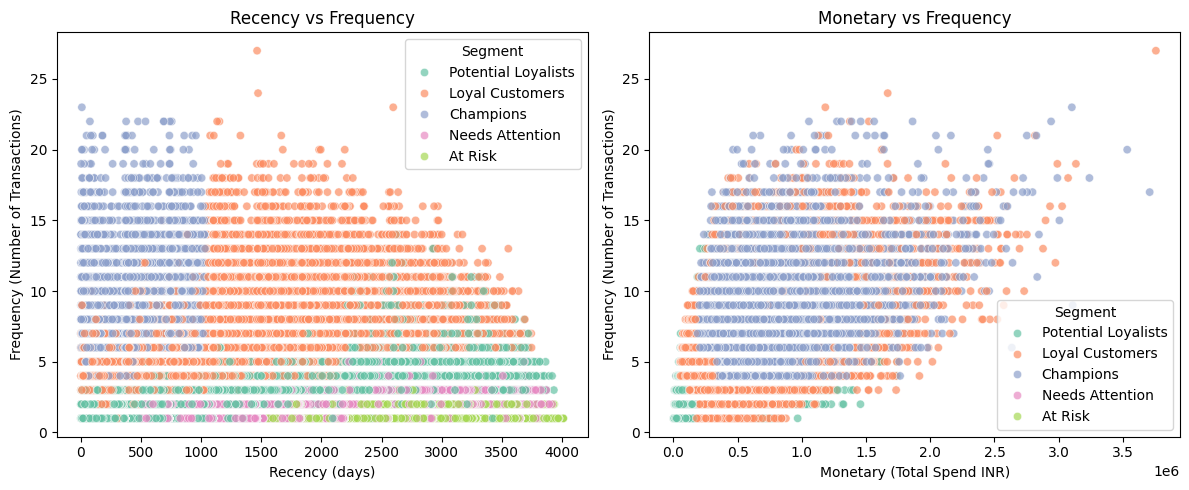

                    Recency Frequency  Monetary        
                       mean      mean      mean   count
Segment                                                
At Risk              2407.6       1.3   45047.9   34652
Champions             430.9       7.5  585813.8   19198
Loyal Customers      1096.5       5.2  397125.6   86191
Needs Attention      1648.7       1.6   82952.3   78840
Potential Loyalists  1239.0       2.6  171305.7  136088


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# def monthly_sales_heatmap(df):

#     # Convert order_month to int if it's not already
#     df['order_month'] = df['order_month'].astype(int)
#     df['order_year'] = df['order_year'].astype(int)

#     # --- 1. Monthly Sales Heatmap (Year vs Month) ---

#     monthly_sales = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

#     # Pivot for heatmap
#     sales_pivot = monthly_sales.pivot(index='order_month', columns='order_year', values='clean_final_amount_inr')

#     plt.figure(figsize=(12, 6))
#     sns.heatmap(sales_pivot, annot=False, fmt=".0f", cmap="YlGnBu")
#     plt.title("Monthly Sales Heatmap (INR)")
#     plt.ylabel("Month")
#     plt.xlabel("Year")
#     plt.savefig("monthly_sales_heatmap.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # --- 2. Identify Peak Selling Months (Overall) ---

#     monthly_totals = df.groupby('order_month')['clean_final_amount_inr'].sum().sort_values(ascending=False)
#     print("\nPeak Selling Months by Total Sales:")
#     print(monthly_totals)

#     plt.figure(figsize=(10, 5))
#     sns.barplot(x=monthly_totals.index, y=monthly_totals.values, palette="viridis", hue=monthly_totals.values)
#     plt.title("Total Sales by Month")
#     plt.xlabel("Month")
#     plt.ylabel("Total Sales (INR)")
#     plt.savefig("total_sales_by_month.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # --- 3. Compare Seasonal Trends Across Years ---

#     monthly_yearly = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

#     plt.figure(figsize=(14, 7))
#     for year in sorted(monthly_yearly['order_year'].unique()):
#         data = monthly_yearly[monthly_yearly['order_year'] == year]
#         plt.plot(data['order_month'], data['clean_final_amount_inr'], marker='o', label=str(year))

#     plt.title('Seasonal Sales Trend by Year')
#     plt.xlabel('Month')
#     plt.ylabel('Total Sales (INR)')
#     plt.xticks(range(1, 13))
#     plt.legend(title='Year')
#     plt.grid(True)
#     plt.savefig("seasonal_trends_by_year.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # --- 4. Compare Seasonal Trends Across Categories ---

#     # Use cleaned_category column
#     category_monthly = df.groupby(['cleaned_category', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

#     # Normalize sales per category to compare patterns
#     category_monthly['normalized_sales'] = category_monthly.groupby('cleaned_category')['clean_final_amount_inr'].transform(lambda x: x / x.sum())

#     # Plot with facet grid
#     g = sns.FacetGrid(category_monthly, col='cleaned_category', col_wrap=3, height=4, sharey=False)
#     g.map_dataframe(sns.lineplot, x='order_month', y='normalized_sales', marker='o')
#     g.set_titles(col_template="{col_name}")
#     g.set_axis_labels("Month", "Normalized Sales")
#     plt.subplots_adjust(top=0.9)
#     g.figure.suptitle("Normalized Seasonal Sales by Category")
#     g.savefig("seasonal_trends_by_category.png", dpi=300, bbox_inches='tight')
#     plt.show()


# 7. Define segment names based on RFM_Score
# def rfm_segment_name(score):
#     if score >= 13:
#         return 'Champions'
#     elif score >= 10:
#         return 'Loyal Customers'
#     elif score >= 7:
#         return 'Potential Loyalists'
#     elif score >= 5:
#         return 'Needs Attention'
#     else:
#         return 'At Risk'


# def customer_segmentation_analysis(df):

#     # 2. Convert order_date to datetime if not already
#     df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')

#     # 3. Set a reference date for Recency calculation (e.g., day after last order in data)
#     reference_date = df['clean_order_date'].max() + pd.Timedelta(days=1)

#     # 4. Calculate Recency, Frequency, Monetary per customer
#     rfm = df.groupby('customer_id').agg({
#         'clean_order_date': lambda x: (reference_date - x.max()).days,  # Recency
#         'transaction_id': 'nunique',                             # Frequency (count unique transactions)
#         'clean_final_amount_inr': 'sum'                          # Monetary
#     }).reset_index()

#     rfm.rename(columns={
#         'clean_order_date': 'Recency',
#         'transaction_id': 'Frequency',
#         'clean_final_amount_inr': 'Monetary'
#     }, inplace=True)

#     # 5. Explore distribution
#     # Save the full RFM data (per customer)
#     rfm.to_csv("Q3_rfm_customers.csv", index=False)

#     rfm.describe().to_csv("Q3_rfm_describe.csv")

#     print(rfm.describe())

#     # 6. RFM Scoring (scale 1-5)
#     # rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1), duplicates="drop")  # Recent customers get higher score
#     # rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=range(1, 6), duplicates="drop")    # Frequent customers get higher score
#     # rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6), duplicates="drop")     # High spenders get higher score
#     # For Recency
#     recency_bins = pd.qcut(rfm['Recency'], q=5, duplicates='drop')
#     rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=range(len(recency_bins.cat.categories), 0, -1), duplicates='drop')

#     # For Frequency
#     frequency_bins = pd.qcut(rfm['Frequency'], q=5, duplicates='drop')
#     rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=range(1, len(frequency_bins.cat.categories) + 1), duplicates='drop')

#     # For Monetary
#     monetary_bins = pd.qcut(rfm['Monetary'], q=5, duplicates='drop')
#     rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1, len(monetary_bins.cat.categories) + 1), duplicates='drop')

#     # Combine scores into a single RFM segment
#     rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
#     rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

#     rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment_name)

#     # 8. Plotting RFM segments scatter plots

#     plt.figure(figsize=(12,5))

#     plt.subplot(1, 2, 1)
#     sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
#     plt.title('Recency vs Frequency')
#     plt.xlabel('Recency (days)')
#     plt.ylabel('Frequency (Number of Transactions)')

#     plt.subplot(1, 2, 2)
#     sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
#     plt.title('Monetary vs Frequency')
#     plt.xlabel('Monetary (Total Spend INR)')
#     plt.ylabel('Frequency (Number of Transactions)')

#     plt.tight_layout()
#     plt.savefig("Q3_rfm_scatterplots.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # 9. Summary stats per segment
#     segment_summary = rfm.groupby('Segment').agg({
#         'Recency': 'mean',
#         'Frequency': 'mean',
#         'Monetary': ['mean', 'count']
#     }).round(1)
#     print(segment_summary)
#     # Flatten multi-index columns
#     segment_summary.columns = ['_'.join(col).strip() for col in segment_summary.columns.values]
#     segment_summary.reset_index(inplace=True)

#     # Save to CSV
#     segment_summary.to_csv("Q3_rfm_segment_summary.csv", index=False)



def load_and_merge_yearly_files(folder_path):
    # Get all CSV files in the folder
    csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv') and '20' in f])
    
    all_dataframes = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        # print(len(df))
        all_dataframes.append(df)

    # Combine all data
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    return combined_df

data = load_and_merge_yearly_files(r"C:\Users\haris\OneDrive\Desktop\Guvi\Projects\Amazon_Sales_Analysis\dataset\cleaned_dataset")
customer_segmentation_analysis(data)

In [33]:
data.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'clean_order_date', 'clean_original_price_inr',
       'clean_discount_percent', 'clean_final_amount_inr',
       'clean_delivery_charges', 'cleaned_customer_rating',
       'cleaned_product_rating', 'cleaned_customer_city',
       'cleaned_is_prime_member', 'cleaned_is_prime_eligible',
       'cleaned_is_festival_sale', 'cleaned_c